Script to plot the trajectories of the flow rates and concentration simulations over time for all stations (or a subset of them)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os

from matplotlib.dates import DateFormatter

from load_wastewater_data import *

# Update rcParams to set the default font to Times New Roman
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'DejaVu Serif'

In [2]:
# define experiment to be preprocessed
experiment_series = "2024_04_03"

substance = "COVID" # one of PMMoV, COVID
rain_scenario = "KeinRegen" # one of KeinRegen, Nieselregen, MittelstarkerRegen
degradation_setting = "no_decay" # one of "no_decay", "linear_decay_dynamics", "constant_decay_dynamics"

In [3]:
# define paths to store the plots
plot_path = f"../plots/wastewater_model/"
file_name = f"{substance}_{rain_scenario}_{degradation_setting}.png"

In [4]:
os.makedirs(os.path.join(plot_path, "concentrations"), exist_ok=True)
os.makedirs(os.path.join(plot_path, "flow_rates"), exist_ok=True)

## Concentration Plots

In [ ]:
# Load data
df_res = load_systems_data(experiment_series, substance, rain_scenario, degradation_setting, file_type="concentrations")

In [4]:
df_res.head()

minutes  copies/l  temperature sampling_point  memilio_id  \
0      -10       0.0          0.0             10         112   
1      -15       0.0          0.0             10         112   
2      -20       0.0          0.0             10         112   
3      -25       0.0          0.0             10         112   
4      -30       0.0          0.0             10         112   

                 time  time_in_days  
0 2023-12-31 23:50:00      0.041667  
1 2023-12-31 23:45:00      0.038194  
2 2023-12-31 23:40:00      0.034722  
3 2023-12-31 23:35:00      0.031250  
4 2023-12-31 23:30:00      0.027778

### Visualize three stations

/tmp/ipykernel_189212/2639670865.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(["0", "2", "4", "6", "8", "10", "12", "14"])
/tmp/ipykernel_189212/2639670865.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(["0", "2", "4", "6", "8", "10", "12", "14"])
/tmp/ipykernel_189212/2639670865.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(["0", "2", "4", "6", "8", "10", "12", "14"])


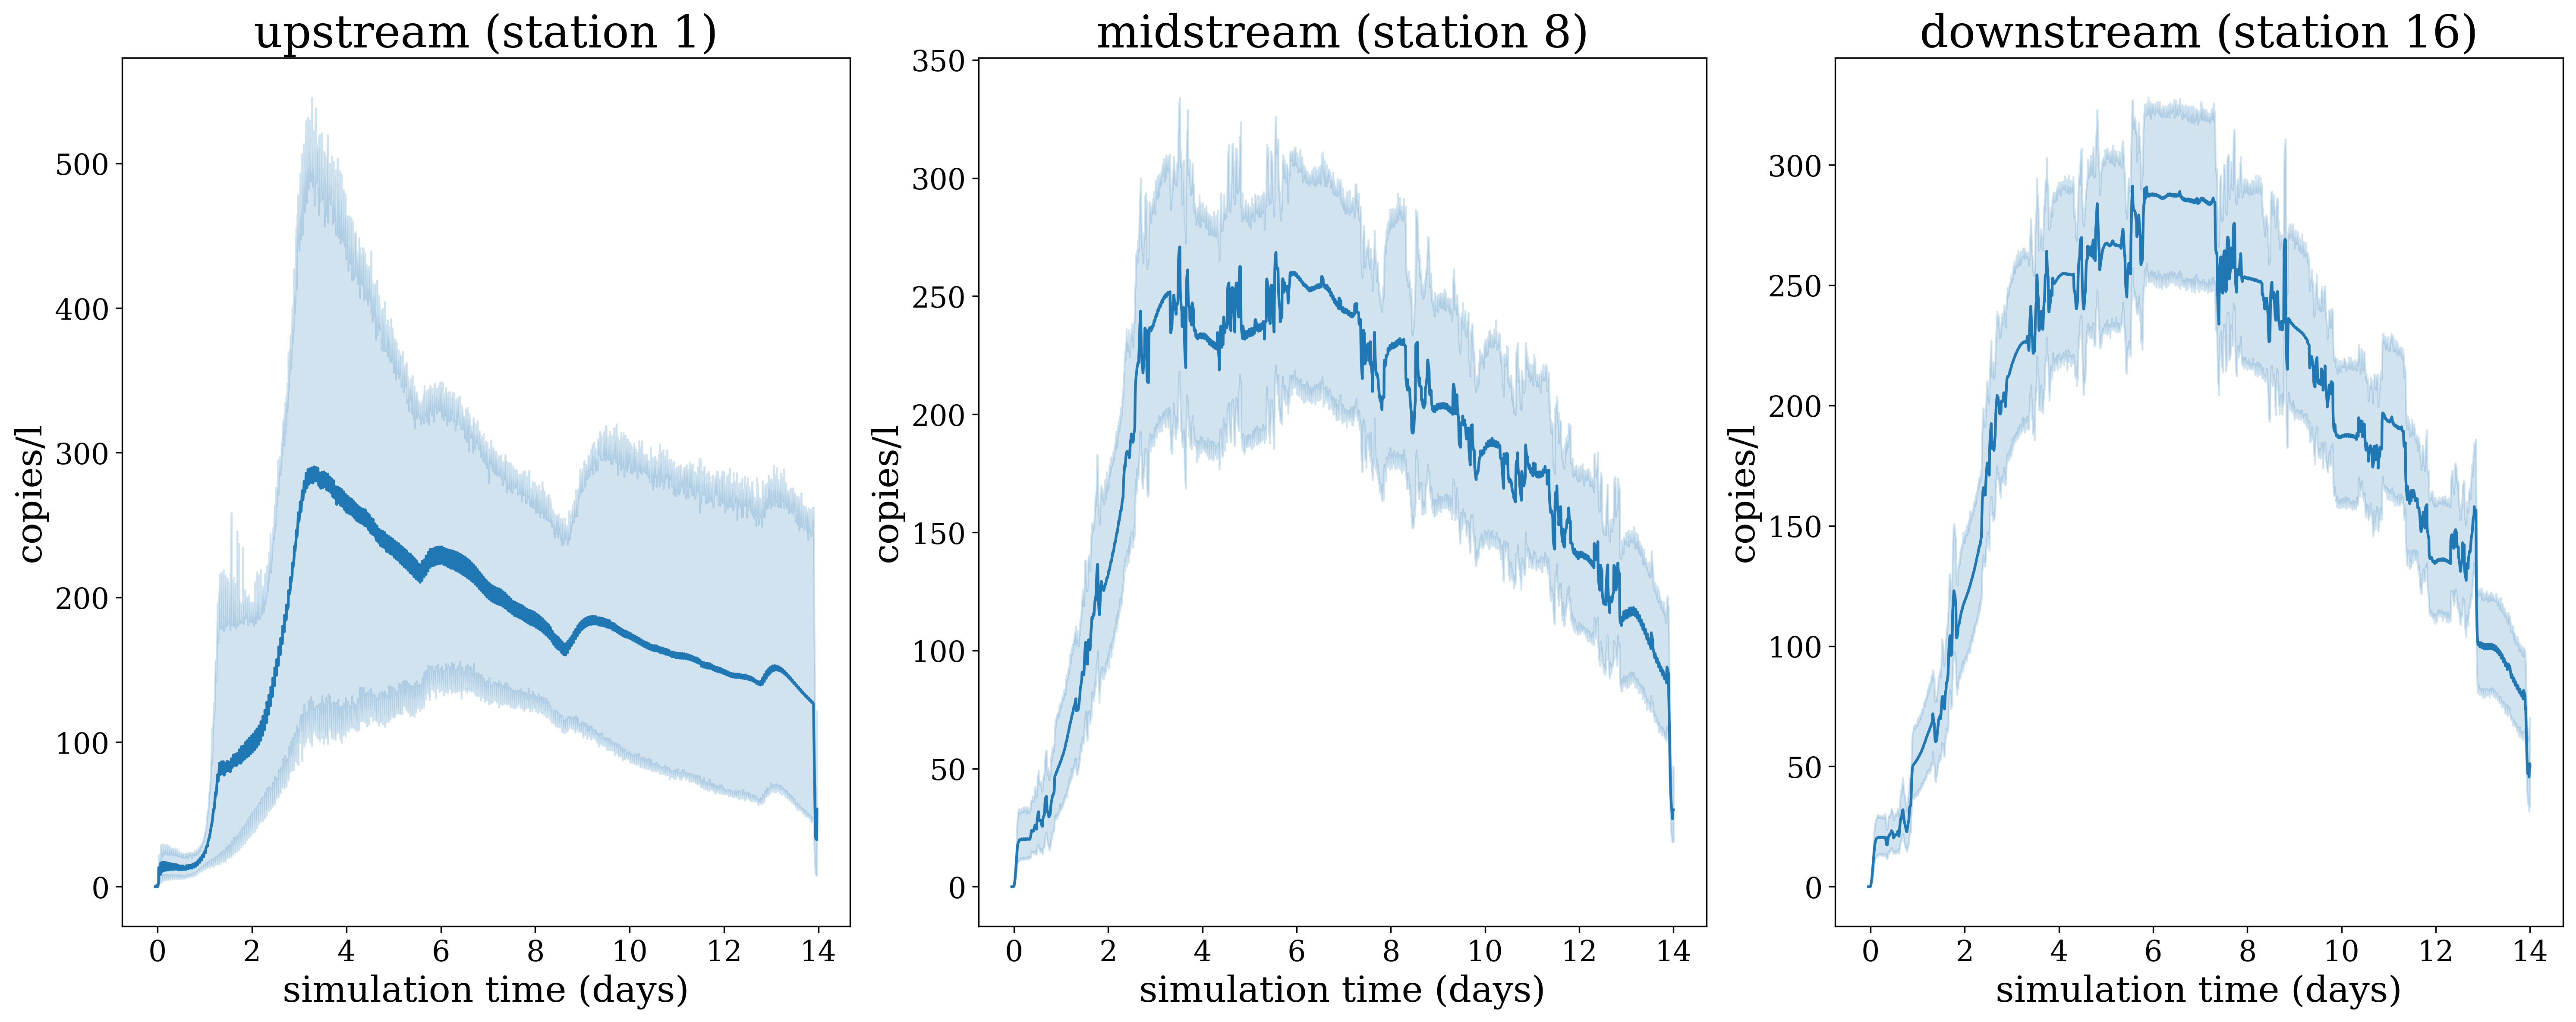

In [7]:
date_form = DateFormatter("%-d")

fig, axs = plt.subplots(ncols=3, sharey=False, figsize=(20, 8), dpi=300)
for i, (variate, variate_title) in enumerate(zip(["1", "8", "16"], ["upstream (station 1)", "midstream (station 8)", "downstream (station 16)"])):
    sns.lineplot(data=df_res.loc[df_res.sampling_point==variate,:], x="time", y="copies/l", ax=axs[i])
    axs[i].set_title(f"{variate_title}", fontsize=25)    
    axs[i].xaxis.set_major_formatter(date_form) 
    axs[i].set_xlabel(f"simulation time [days]", fontsize=20) # , fontsize=15
    axs[i].set_xticklabels(["0", "2", "4", "6", "8", "10", "12", "14"])
    axs[i].set_ylabel("virus levels [copies/l]", fontsize=20)
    axs[i].tick_params(axis='x', labelsize=16)
    axs[i].tick_params(axis='y', labelsize=16)

fig.tight_layout()
fig.savefig(os.path.join(plot_path, "concentrations", f"up_mid_down_{file_name}"))

### Visualize all stations

0 0 0 1


/tmp/ipykernel_57564/1443360407.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[j, col].set_xticklabels(["0", "2", "4", "6", "8", "10", "12", "14"])


1 0 1 2


/tmp/ipykernel_57564/1443360407.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[j, col].set_xticklabels(["0", "2", "4", "6", "8", "10", "12", "14"])


2 0 2 3


/tmp/ipykernel_57564/1443360407.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[j, col].set_xticklabels(["0", "2", "4", "6", "8", "10", "12", "14"])


3 0 3 4


/tmp/ipykernel_57564/1443360407.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[j, col].set_xticklabels(["0", "2", "4", "6", "8", "10", "12", "14"])


4 1 0 5


/tmp/ipykernel_57564/1443360407.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[j, col].set_xticklabels(["0", "2", "4", "6", "8", "10", "12", "14"])


5 1 1 6


/tmp/ipykernel_57564/1443360407.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[j, col].set_xticklabels(["0", "2", "4", "6", "8", "10", "12", "14"])


6 1 2 7


/tmp/ipykernel_57564/1443360407.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[j, col].set_xticklabels(["0", "2", "4", "6", "8", "10", "12", "14"])


7 1 3 8


/tmp/ipykernel_57564/1443360407.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[j, col].set_xticklabels(["0", "2", "4", "6", "8", "10", "12", "14"])


8 2 0 9


/tmp/ipykernel_57564/1443360407.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[j, col].set_xticklabels(["0", "2", "4", "6", "8", "10", "12", "14"])


9 2 1 10


/tmp/ipykernel_57564/1443360407.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[j, col].set_xticklabels(["0", "2", "4", "6", "8", "10", "12", "14"])


10 2 2 11


/tmp/ipykernel_57564/1443360407.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[j, col].set_xticklabels(["0", "2", "4", "6", "8", "10", "12", "14"])


11 2 3 12


/tmp/ipykernel_57564/1443360407.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[j, col].set_xticklabels(["0", "2", "4", "6", "8", "10", "12", "14"])


12 3 0 13


/tmp/ipykernel_57564/1443360407.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[j, col].set_xticklabels(["0", "2", "4", "6", "8", "10", "12", "14"])


13 3 1 14


/tmp/ipykernel_57564/1443360407.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[j, col].set_xticklabels(["0", "2", "4", "6", "8", "10", "12", "14"])


14 3 2 15


/tmp/ipykernel_57564/1443360407.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[j, col].set_xticklabels(["0", "2", "4", "6", "8", "10", "12", "14"])


15 3 3 16


/tmp/ipykernel_57564/1443360407.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[j, col].set_xticklabels(["0", "2", "4", "6", "8", "10", "12", "14"])


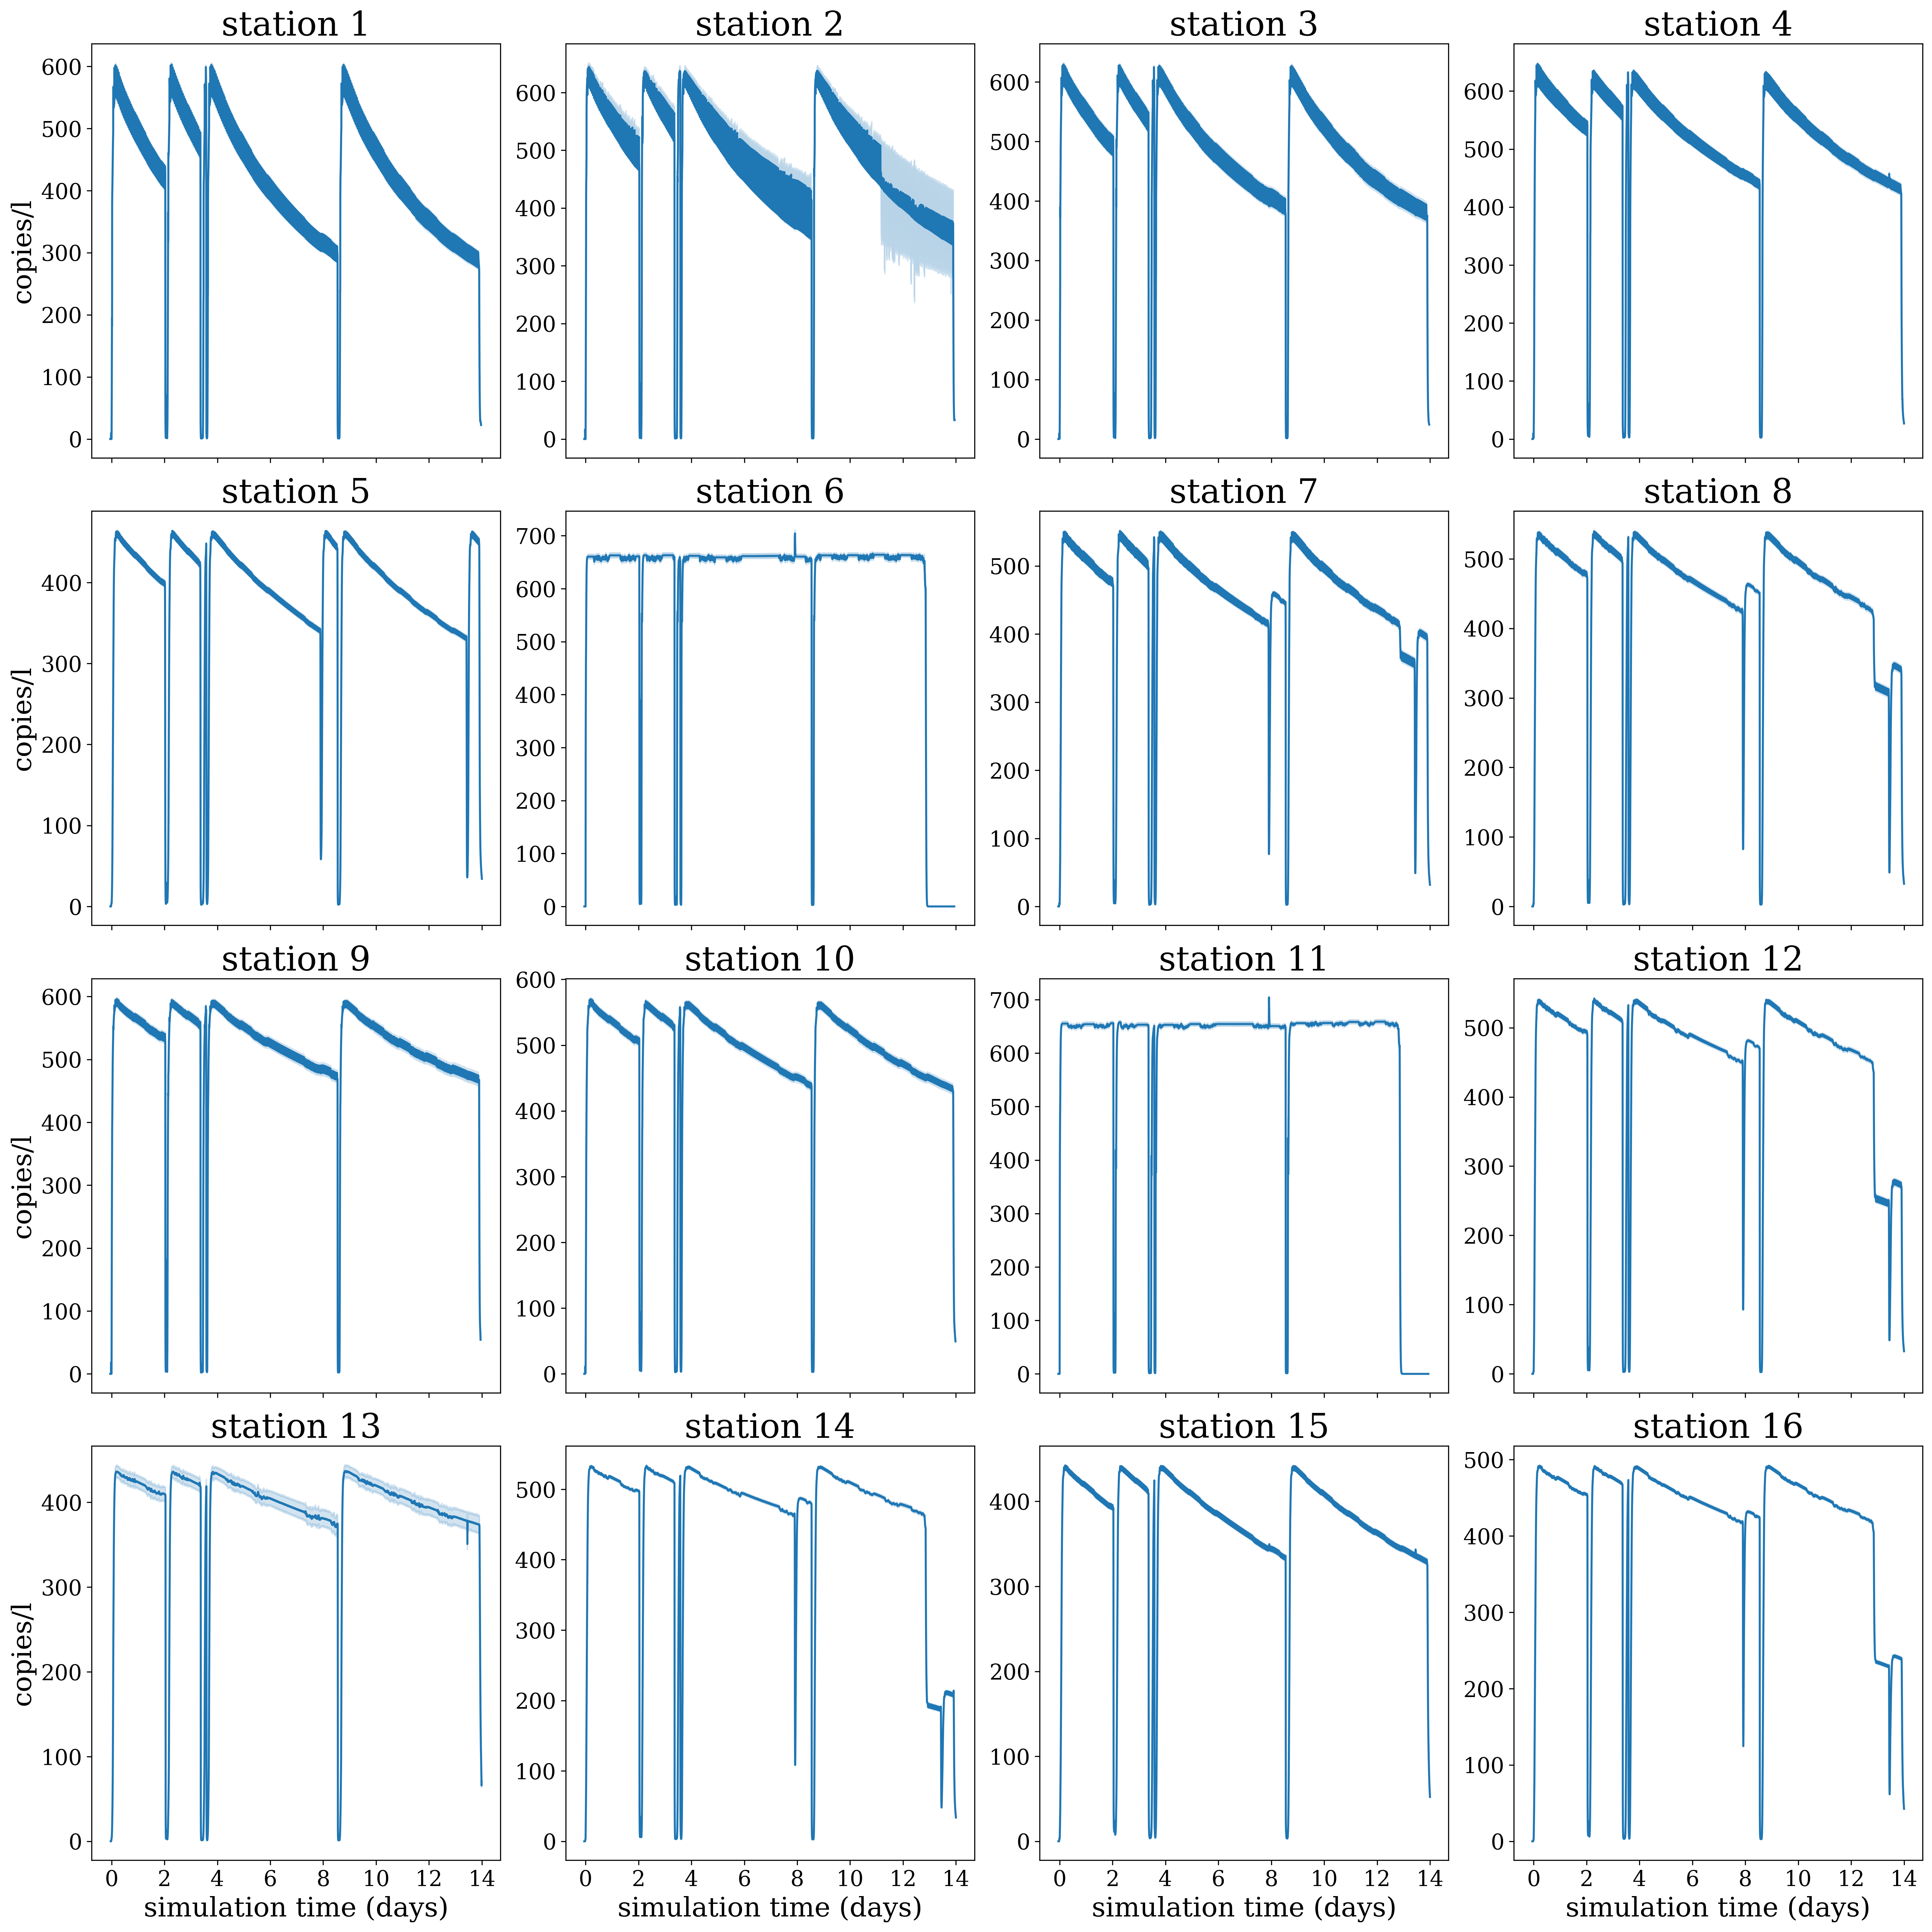

In [17]:
date_form = DateFormatter("%-d")

stations = [str(el) for el in range(1, 17)]

fig, axs = plt.subplots(ncols=4, nrows = 4, sharex = True, sharey=False, figsize=(20, 20), dpi=300)
j = 0
for i, (variate, variate_title) in enumerate(zip(stations, [f"station {el}" for el in stations])):
    col = i - j*4
    print(i, j, col, variate)
    sns.lineplot(data=df_res.loc[df_res.sampling_point==variate,:], x="time", y="copies/l", ax=axs[j, col])
    axs[j, col].set_title(f"{variate_title}", fontsize=25)    
    axs[j, col].xaxis.set_major_formatter(date_form)
    axs[j, col].set_xticklabels(["0", "2", "4", "6", "8", "10", "12", "14"])
    if j == 3:
        axs[j, col].set_xlabel(f"simulation time [days]", fontsize=20) # , fontsize=15
    else:
        axs[j, col].set_xlabel("")
    if col==0:
        axs[j, col].set_ylabel("virus levels [copies/l]", fontsize=20)
    else:
        axs[j, col].set_ylabel("")
    axs[j, col].tick_params(axis='x', labelsize=16)
    axs[j, col].tick_params(axis='y', labelsize=16)
    if col==3:
        j += 1
    

fig.tight_layout()
fig.savefig(os.path.join(plot_path, "concentrations", f"all_stations_{file_name}"))

## Flow Rate Plots

In [10]:
df_res = load_systems_data(experiment_series, substance, rain_scenario, degradation_setting, file_type="flow_rates")

0 0 0 1


/tmp/ipykernel_77376/1576400749.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[j, col].set_xticklabels(["0", "2", "4", "6", "8", "10", "12", "14"])


1 0 1 2


/tmp/ipykernel_77376/1576400749.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[j, col].set_xticklabels(["0", "2", "4", "6", "8", "10", "12", "14"])


2 0 2 3


/tmp/ipykernel_77376/1576400749.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[j, col].set_xticklabels(["0", "2", "4", "6", "8", "10", "12", "14"])


3 0 3 4


/tmp/ipykernel_77376/1576400749.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[j, col].set_xticklabels(["0", "2", "4", "6", "8", "10", "12", "14"])


4 1 0 5


/tmp/ipykernel_77376/1576400749.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[j, col].set_xticklabels(["0", "2", "4", "6", "8", "10", "12", "14"])


5 1 1 6


/tmp/ipykernel_77376/1576400749.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[j, col].set_xticklabels(["0", "2", "4", "6", "8", "10", "12", "14"])


6 1 2 7


/tmp/ipykernel_77376/1576400749.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[j, col].set_xticklabels(["0", "2", "4", "6", "8", "10", "12", "14"])


7 1 3 8


/tmp/ipykernel_77376/1576400749.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[j, col].set_xticklabels(["0", "2", "4", "6", "8", "10", "12", "14"])


8 2 0 9


/tmp/ipykernel_77376/1576400749.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[j, col].set_xticklabels(["0", "2", "4", "6", "8", "10", "12", "14"])


9 2 1 10


/tmp/ipykernel_77376/1576400749.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[j, col].set_xticklabels(["0", "2", "4", "6", "8", "10", "12", "14"])


10 2 2 11


/tmp/ipykernel_77376/1576400749.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[j, col].set_xticklabels(["0", "2", "4", "6", "8", "10", "12", "14"])


11 2 3 12


/tmp/ipykernel_77376/1576400749.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[j, col].set_xticklabels(["0", "2", "4", "6", "8", "10", "12", "14"])
/tmp/ipykernel_77376/1576400749.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[j, col].set_xticklabels(["0", "2", "4", "6", "8", "10", "12", "14"])


12 3 0 13
13 3 1 14


/tmp/ipykernel_77376/1576400749.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[j, col].set_xticklabels(["0", "2", "4", "6", "8", "10", "12", "14"])
/tmp/ipykernel_77376/1576400749.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[j, col].set_xticklabels(["0", "2", "4", "6", "8", "10", "12", "14"])


14 3 2 15
15 3 3 16


/tmp/ipykernel_77376/1576400749.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[j, col].set_xticklabels(["0", "2", "4", "6", "8", "10", "12", "14"])


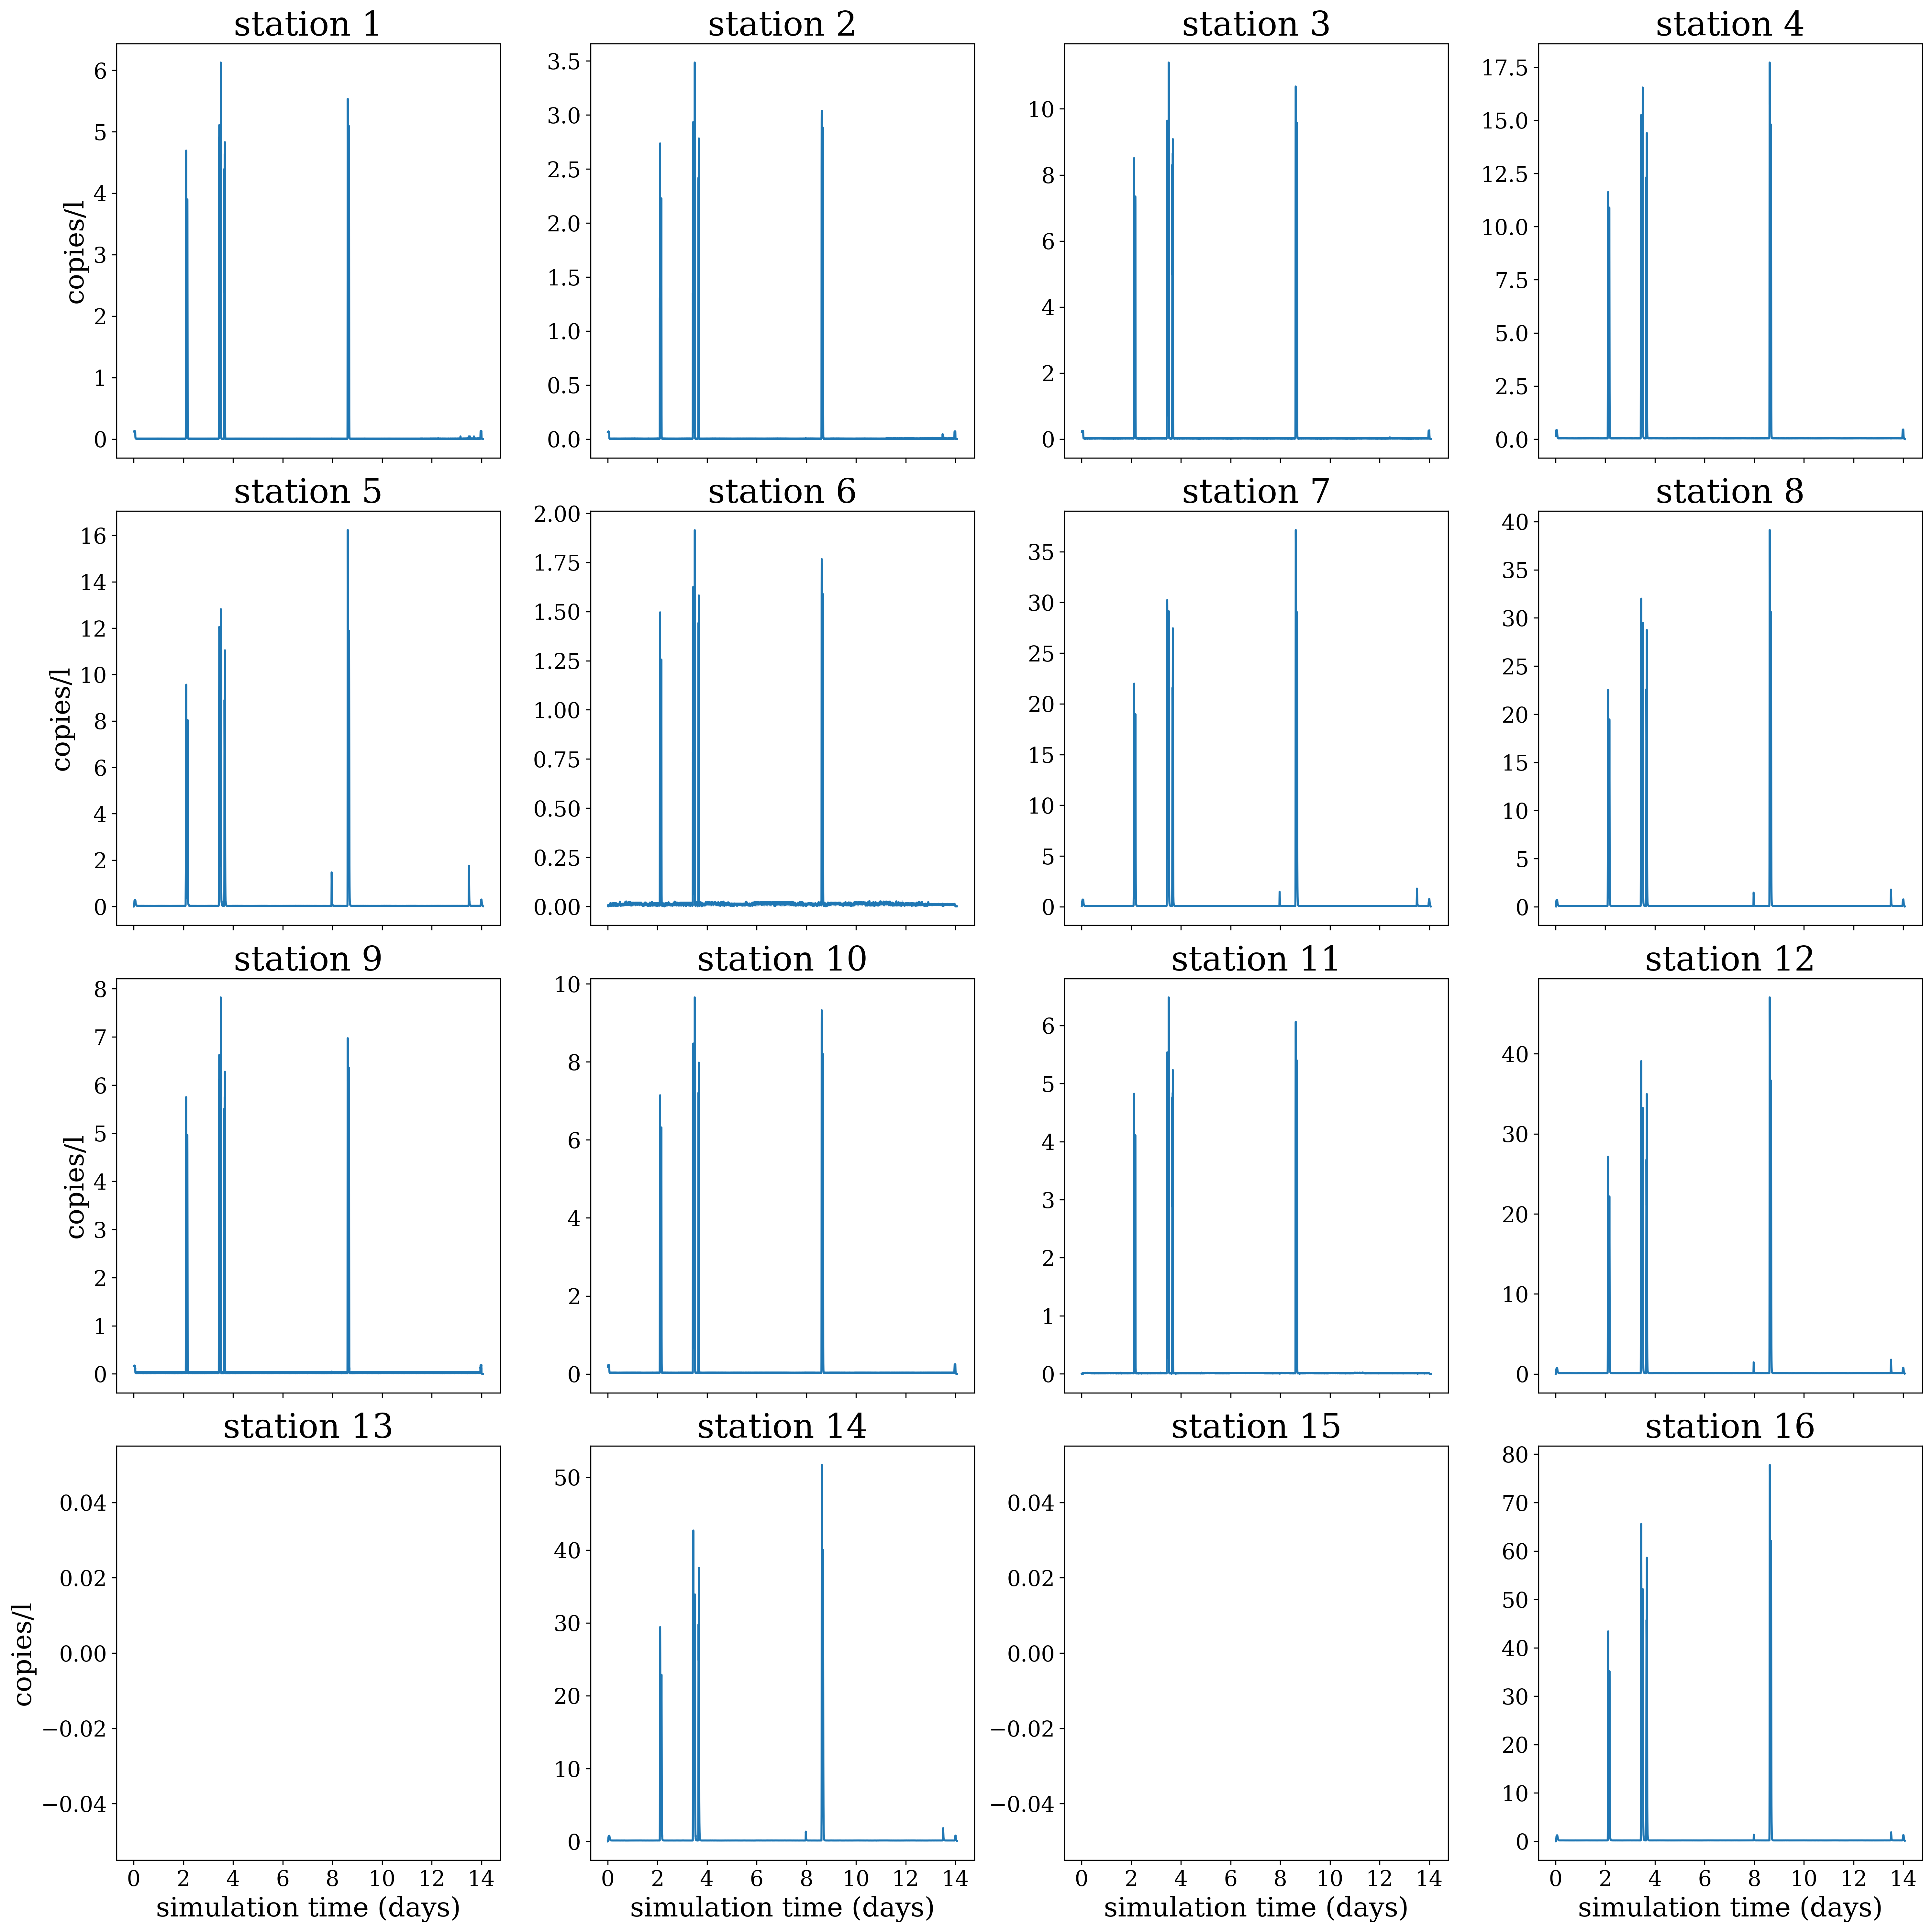

In [13]:
date_form = DateFormatter("%-d")

stations = [str(el) for el in range(1, 17)]

fig, axs = plt.subplots(ncols=4, nrows = 4, sharex = True, sharey=False, figsize=(20, 20), dpi=300)
j = 0
for i, (variate, variate_title) in enumerate(zip(stations, [f"station {el}" for el in stations])):
    col = i - j*4
    print(i, j, col, variate)
    sns.lineplot(data=df_res.loc[df_res.sampling_point==variate,:], x="time", y="l/s", ax=axs[j, col])
    axs[j, col].set_title(f"{variate_title}", fontsize=25)    
    axs[j, col].xaxis.set_major_formatter(date_form)
    axs[j, col].set_xticklabels(["0", "2", "4", "6", "8", "10", "12", "14"])
    if j == 3:
        axs[j, col].set_xlabel(f"simulation time [days]", fontsize=20) # , fontsize=15
    else:
        axs[j, col].set_xlabel("")
    if col==0:
        axs[j, col].set_ylabel("flow rates [l/s]", fontsize=20)
    else:
        axs[j, col].set_ylabel("")
    axs[j, col].tick_params(axis='x', labelsize=16)
    axs[j, col].tick_params(axis='y', labelsize=16)
    if col==3:
        j += 1
    

fig.tight_layout()
fig.savefig(os.path.join(plot_path, "flow_rates", f"all_stations_{file_name}"))